<a href="https://colab.research.google.com/github/gabcsx/CCMACLRL_EXERCISES_COM221ML/blob/main/Exercise5_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 5B

# House Price Prediction using Multiple Linear Regression

<center><img src="https://raw.githubusercontent.com/Masterx-AI/Project_Housing_Price_Prediction_/main/hs.jpg" style="width: 700px;"/>

### Description:

A simple yet challenging project, to predict the housing price based on certain factors like house area, bedrooms, furnished, nearness to mainroad, etc.  The dataset is small yet, it's complexity arises due to the fact that it has strong multicollinearity.  

### Instructions:
Choose the independent variables to creata a decent predictive model using multiple linear regression

## Import libraries 🐍

In [1860]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## A. Understanding the Dataset

In [1861]:
df = pd.read_csv("house_prices.csv")

In [1862]:
# Random 10 samples of data
df.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
470,3010000,5076,3,1,1,no,no,no,no,no,0,no,unfurnished
393,3500000,7424,3,1,1,no,no,no,no,no,0,no,unfurnished
92,6405000,4800,3,2,4,yes,yes,no,no,yes,0,no,furnished
43,7700000,6000,4,2,4,yes,no,no,no,no,2,no,semi-furnished
146,5600000,10500,2,1,1,yes,no,no,no,no,1,no,semi-furnished
477,2940000,4960,2,1,1,yes,no,no,no,no,0,no,unfurnished
126,5880000,7160,3,1,1,yes,no,yes,no,no,2,yes,unfurnished
64,7000000,11175,3,1,1,yes,no,yes,no,yes,1,yes,furnished
360,3710000,4040,2,1,1,yes,no,no,no,no,0,no,semi-furnished
228,4690000,3630,3,1,2,yes,no,no,no,no,2,no,semi-furnished


In [1863]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [1864]:
df.shape # data shape

(545, 13)

In [1865]:
df.describe() # data stats

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [1866]:
df.isnull().sum() # null values check

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [1867]:
df.duplicated().sum() # duplicate values check

0

## B. Data Visualization

1. Use a `.scatterplot()` to check the relationship between area and price

- the x axis should be the area
- the y axis should be the price
- the color of each data point should be based on the furnishing status


<Axes: xlabel='area', ylabel='price'>

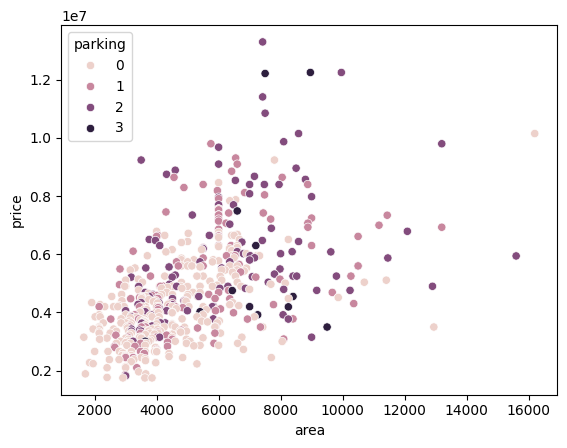

In [1868]:
# Put your answer here
sns.scatterplot(y=df['price'],x=df['area'],hue=df['parking'])

2. Create a `.pairplot()` to check the relationships between the independent and dependent variables

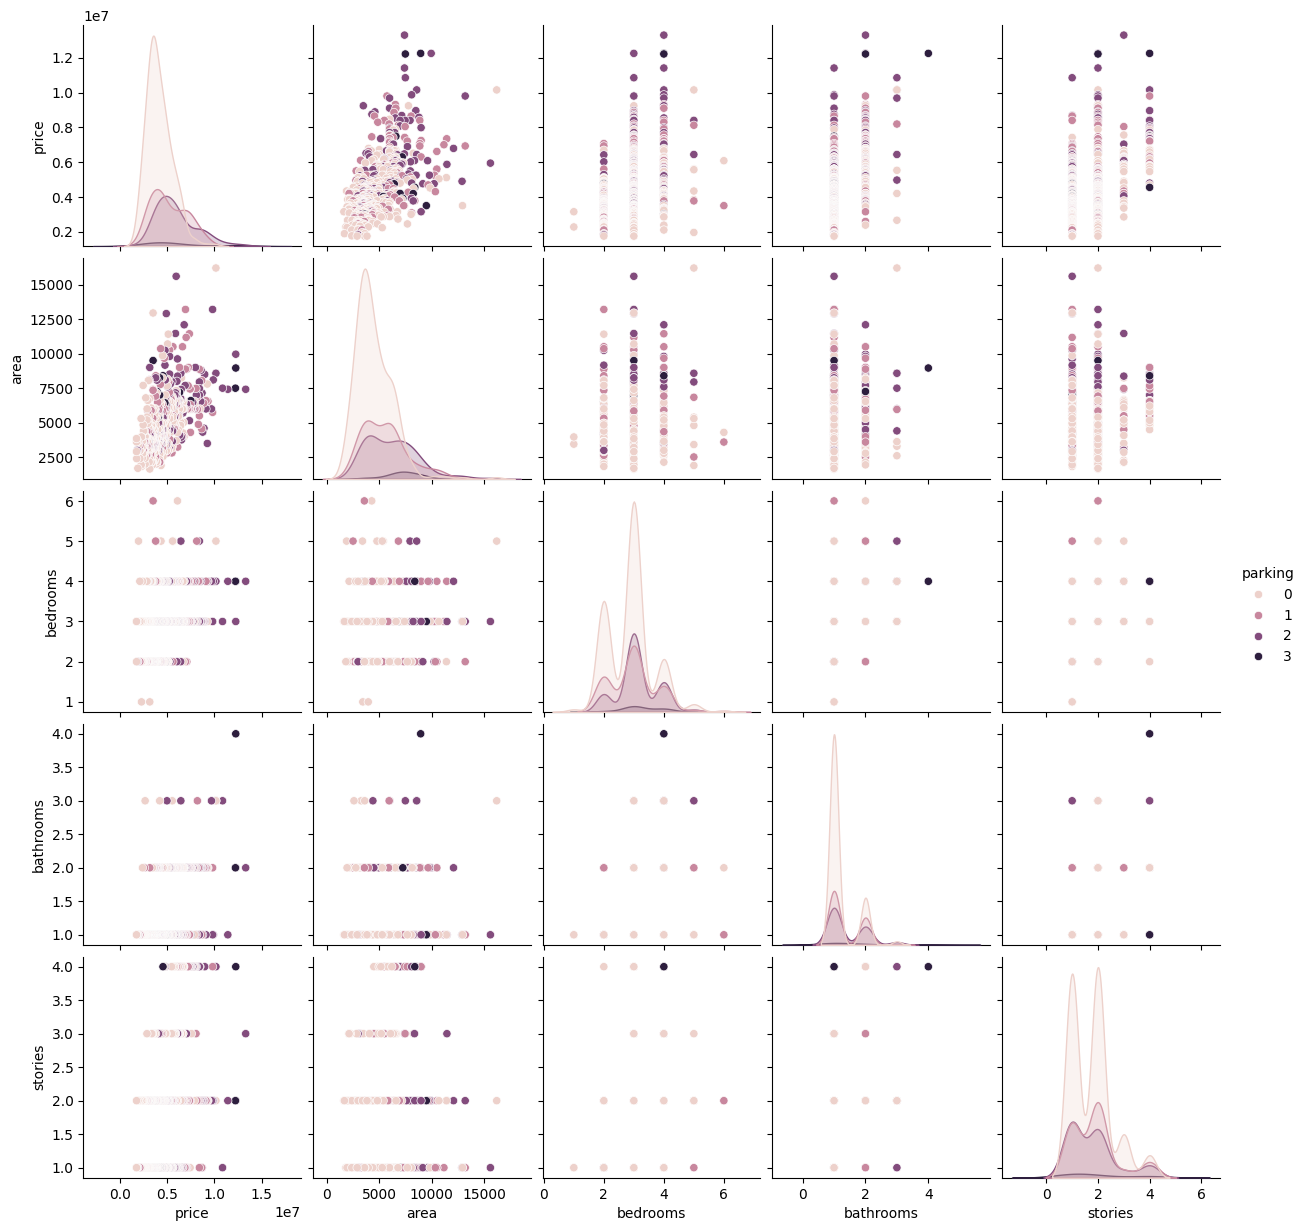

In [1869]:
# Put your answer here
sns.pairplot(df, hue="parking")

## C. Data pre-processing

3. Create a copy of the dataframe using `.copy()`

In [1870]:
# Put your answer here
data=df.copy()

4. Apply the `get_dummies()` method to convert the categorical columns below into numbers/dummy variables.

- furnishingstatus
- mainroad
- guestroom
- basement
- hotwaterheating
- airconditioning
- prefarea

In [1871]:
# Put your answer here
status = pd.get_dummies(data[['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']], drop_first = True)

5. Concatenate the converted columns to the dataframe copy using `.concat()`

In [1872]:
# Put your answer here
data = pd.concat([data,status],axis=1)

6. Drop the categorical columns below using `.drop()`.

- furnishingstatus
- mainroad
- guestroom
- basement
- hotwaterheating
- airconditioning
- prefarea

In [1873]:
# Put your answer here
data.drop(['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'], axis = 1, inplace = True)

## D. Feature Selection

7. Use `.corr()` to check for multicollinearity between the features/independent variables

In [1874]:
# Put your answer
correlation = data.corr()
correlation

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394,0.063656,-0.280587,0.296898,0.255517,0.187057,0.093073,0.452954,0.329777
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980,0.006156,-0.142278,0.288874,0.140297,0.047417,-0.009229,0.222393,0.234779
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270,0.050040,-0.126252,-0.012033,0.080549,0.097312,0.046049,0.160603,0.079023
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496,0.029834,-0.132107,0.042398,0.126469,0.102106,0.067159,0.186915,0.063472
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547,-0.003648,-0.082972,0.121706,0.043538,-0.172394,0.018847,0.293602,0.044425
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000,0.041327,-0.165705,0.204433,0.037466,0.051497,0.067864,0.159173,0.091627
furnishingstatus_semi-furnished,0.063656,0.006156,0.050040,0.029834,-0.003648,0.041327,1.000000,-0.588405,0.011450,0.005821,0.050284,0.063819,-0.053179,-0.011535
furnishingstatus_unfurnished,-0.280587,-0.142278,-0.126252,-0.132107,-0.082972,-0.165705,-0.588405,1.000000,-0.133123,-0.099023,-0.117935,-0.059194,-0.094086,-0.081271
mainroad_yes,0.296898,0.288874,-0.012033,0.042398,0.121706,0.204433,0.011450,-0.133123,1.000000,0.092337,0.044002,-0.011781,0.105423,0.199876
guestroom_yes,0.255517,0.140297,0.080549,0.126469,0.043538,0.037466,0.005821,-0.099023,0.092337,1.000000,0.372066,-0.010308,0.138179,0.160897


8. Create a heatmap using `.heatmap()` to visualize the correlation in a plot.

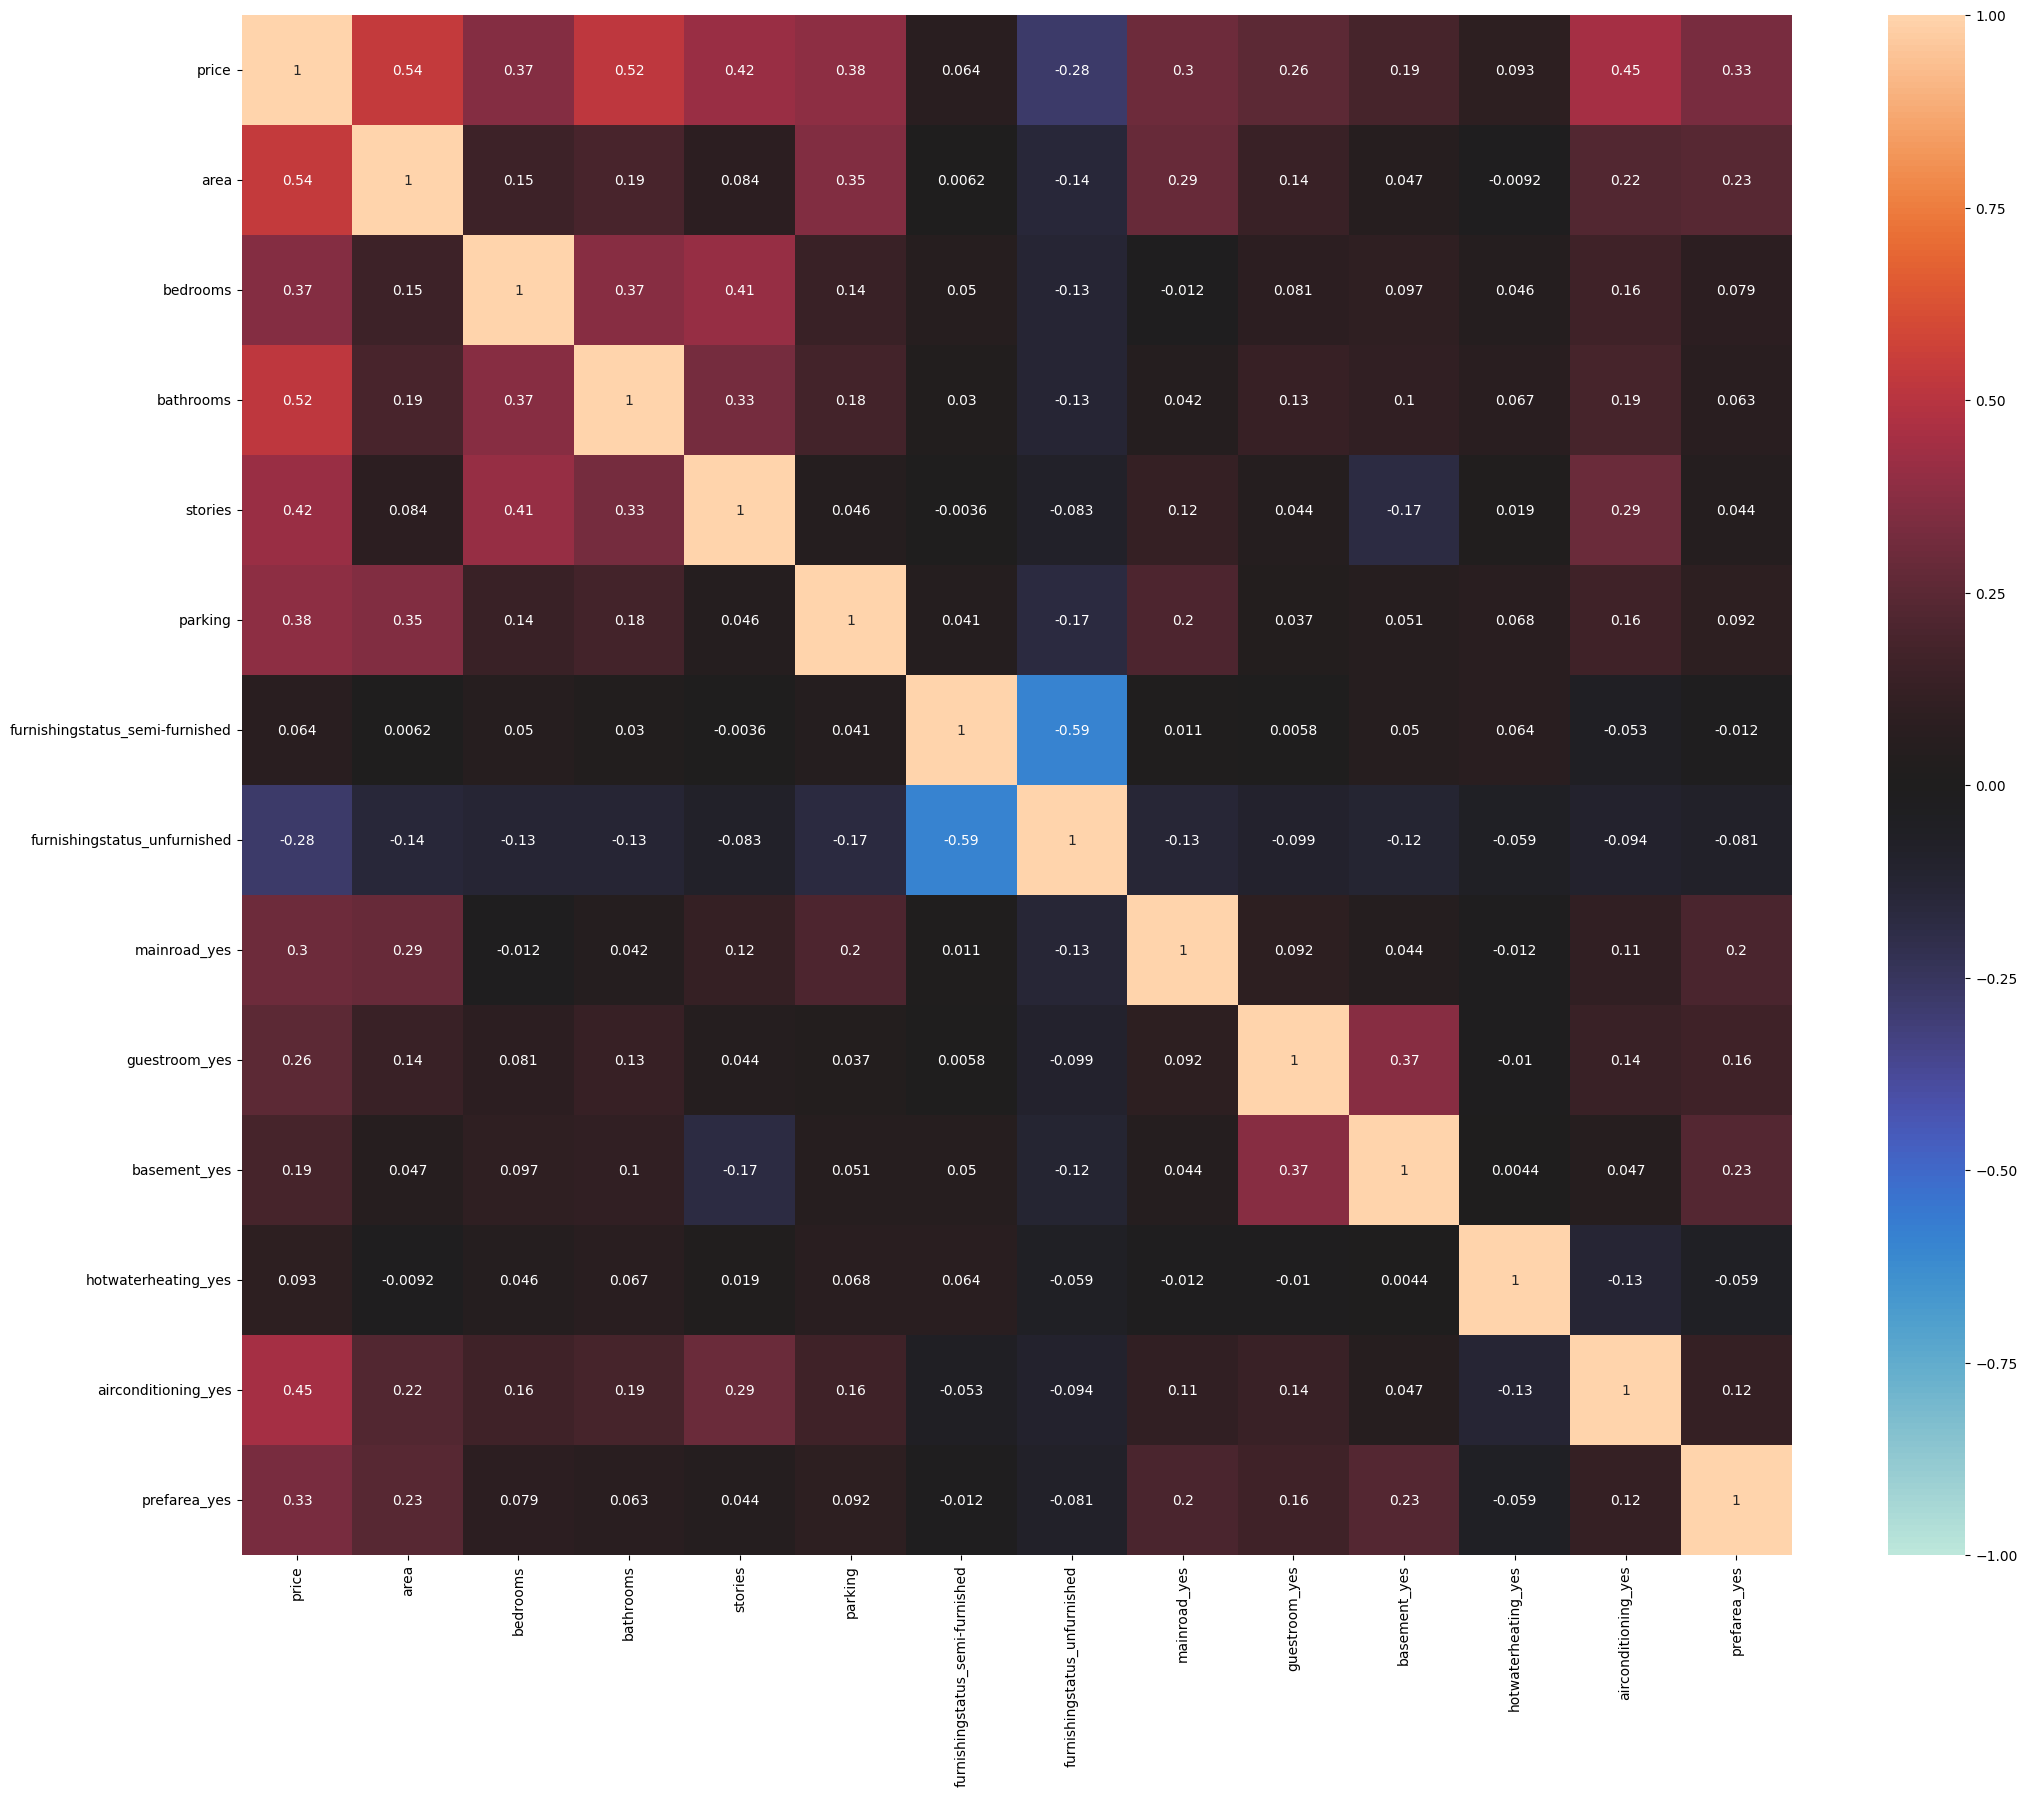

In [1875]:
# Put your answer here
plt.figure(figsize=[25,20])
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, center=0)
plt.show()

## E. Building the Model



9. Split the data set into a training and test set

In [1922]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   bedrooms                         545 non-null    int64
 3   bathrooms                        545 non-null    int64
 4   stories                          545 non-null    int64
 5   parking                          545 non-null    int64
 6   furnishingstatus_semi-furnished  545 non-null    bool 
 7   furnishingstatus_unfurnished     545 non-null    bool 
 8   mainroad_yes                     545 non-null    bool 
 9   guestroom_yes                    545 non-null    bool 
 10  basement_yes                     545 non-null    bool 
 11  hotwaterheating_yes              545 non-null    bool 
 12  airconditioning_yes              545 non-null    b

In [1932]:
# Put your answer here
X = data.drop(['price','hotwaterheating_yes', 'furnishingstatus_unfurnished'],axis=1)
y = data['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=46)

In [1933]:
# Put your answer here
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

11. Create a new dataframe containing the unscaled features

In [1934]:
# Put your answer here
unscaled_df = pd.DataFrame(X_train, columns=X.columns)
unscaled_df.head()

,area,bedrooms,bathrooms,stories,parking,furnishingstatus_semi-furnished,mainroad_yes,guestroom_yes,basement_yes,airconditioning_yes,prefarea_yes
52,6000,4,2,4,1,False,True,True,False,True,False
107,6420,3,1,3,0,False,True,False,True,False,True
458,3850,3,1,2,0,False,True,False,False,False,False
516,3240,2,1,1,1,False,False,True,False,False,False
496,4000,2,1,1,0,False,True,False,False,False,False


12. Create a new dataframe containing the scaled features

In [1935]:
# Put your answer here
scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
scaled_df.head()

,area,bedrooms,bathrooms,stories,parking,furnishingstatus_semi-furnished,mainroad_yes,guestroom_yes,basement_yes,airconditioning_yes,prefarea_yes
0,0.311828,0.6,0.333333,1.000000,0.333333,0.0,1.0,1.0,0.0,1.0,0.0
1,0.341935,0.4,0.000000,0.666667,0.000000,0.0,1.0,0.0,1.0,0.0,1.0
2,0.157706,0.4,0.000000,0.333333,0.000000,0.0,1.0,0.0,0.0,0.0,0.0
3,0.113978,0.2,0.000000,0.000000,0.333333,0.0,0.0,1.0,0.0,0.0,0.0
4,0.168459,0.2,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0


13. Create a new instance of a Linear Regression model  

In [1936]:
# Put your answer here
model = LinearRegression()

14. Use the `fit()` method to train your model using the training set.

In [1937]:
# Put your answer here
model.fit(X_train_scaled, y_train)

LinearRegression()

15. Use the `predict()` method using the test set

In [1938]:
# Put your answer
y_pred = model.predict(X_test_scaled)


16. Compute the $R^2$ of the model

In [1939]:
# Put your answer here
olsmod = sm.OLS(y_test, X_test_scaled).fit()
olsmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                              392.9
Date:                Thu, 12 Sep 2024   Prob (F-statistic):                   4.16e-132
Time:                        10:25:47   Log-Likelihood:                         -3338.9
No. Observations:                 218   AIC:                                      6700.
Df Residuals:                     207   BIC:                                      6737.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3.362e+06    5.1e+05      6.596      0.000    2.36e+06    4.37e+06
x2          2.741e+06   4.43e+05      6.183      0.000    1.87e+06    3.62e+06
x3          2.915e+06   5.12e+05      5.698      0.000    1.91e+06    3.92e+06
x4          1.519e+06   3.18e+05      4.779      0.000    8.92e+05    2.15e+06
x5          6.503e+05    2.9e+05      2.244      0.026     7.9e+04    1.22e+06
x6          1.978e+05   1.54e+05      1.282      0.201   -1.06e+05    5.02e+05
x7          1.341e+06   1.89e+05      7.094      0.000    9.68e+05    1.71e+06
x8          3.837e+05   2.31e+05      1.664      0.098   -7.09e+04    8.38e+05
x9          4.852e+05   1.81e+05      2.683      0.008    1.29e+05    8.42e+05
x10         8.512e+05   1.76e+05      4.840      0.000    5.05e+05     1.2e+06
x11         6.754e+05   2.09e+05      3.235      0.001    2.64e+05    1.09e+06
==============================================================================
Omnibus:                        8.547   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.014   Jarque-Bera (JB):               10.411
Skew:                           0.313   Prob(JB):                      0.00549
Kurtosis:                       3.869   Cond. No.                         9.92
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1940]:
olsmod.rsquared

0.9542913019204751